In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal

hamming_weight = [bin(n).count("1") for n in range(0, 256)]
plt.rcParams['figure.figsize'] = [20,35]

In [ ]:
np.load('textin.npy')
np.load('textout.npy')
np.load('traces.npy')

In [ ]:
textin = np.load('textin.npy')
textout = np.load('textout.npy')
traces = np.load('traces.npy')
num_traces= len(textin)
num_samples = len(traces[0])
num1_traces = np.transpose(traces)


In [ ]:
def clean(tr: np.ndarray, _b, _a):
    for _i in range(len(tr)):
        tr[_i] = signal.lfilter(_b, _a, tr[_i])
    return tr

In [ ]:



plt.plot(traces[0], linewidth=.2, label='Cleaned signal')
plt.legend(loc='best')
plt.show()
b, a = signal.butter(7,0.3, btype='low')
traces = clean(traces, b, a)

In [ ]:
#Таблица S-box использумая в шифровании AES
Sbox = (0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36,
            0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97,
            0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72,
            0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66,
            0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04,
            0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d,
            0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3,
            0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61,
            0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a,
            0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
            0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc,
            0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5,
            0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a,
            0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d,
            0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c,
            0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35,
            0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4,
            0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc,
            0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08,
            0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a,
            0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d,
            0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2,
            0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74,
            0xe8, 0xcb )
Sbox = np.array(Sbox)

In [ ]:
InvSbox = (0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
           0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
           0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
           0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
           0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
           0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
           0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
           0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
           0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
           0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
           0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
           0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
           0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
           0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
           0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
           0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d)

InvSbox = np.array(InvSbox)

In [ ]:

import math

def mean(x):
    sum = 0.0
    for i in x:
         sum += i
    return sum / len(x) 

def sampleStandardDeviation(x):
    sumv = 0.0
    for i in x:
         sumv += (i - mean(x))**2
    return math.sqrt(sumv/(len(x)-1))

def pearson(x,y):
    scorex = []
    scorey = []

    for i in x: 
        scorex.append((i - mean(x))/sampleStandardDeviation(x)) 

    for j in y:
        scorey.append((j - mean(y))/sampleStandardDeviation(y))
   
    return (sum([i*j for i,j in zip(scorex,scorey)]))/(len(x)-1)

In [ ]:

def cb (texts_in, byte_num, n):
    for hyp in range(256):
        la = np.zeros(n)
        for _i in range(n):                     
            la[_i] = hamming_weight[Sbox[texts_in[_i][byte_num] ^ hyp]]
        yield hyp, la

In [62]:

key = [] 
moment = [] 
correlation = []

for k in range(16):
    correlation = 0
    byte = 0 
    moment = 0 
    for byte, leak in cb(textout, k, num_traces):

        for i in range(num_samples):
            values = num1_traces[i] 
            correlation1 = pearson(leak, values) 
            if correlation1 > correlation:
                correlation = correlation1
                byte = byte
                moment = i
        print(byte)

    moment.append(leak_place)
    key.append(byte)
    correlation.append(correlation)
    print('byte number:', k) 
    print('byte:', byte)
    print('correlation:', correlation)
    print('moment:', moment[-1])

print(key)
print(moment)
print(correlation)

KeyboardInterrupt: 

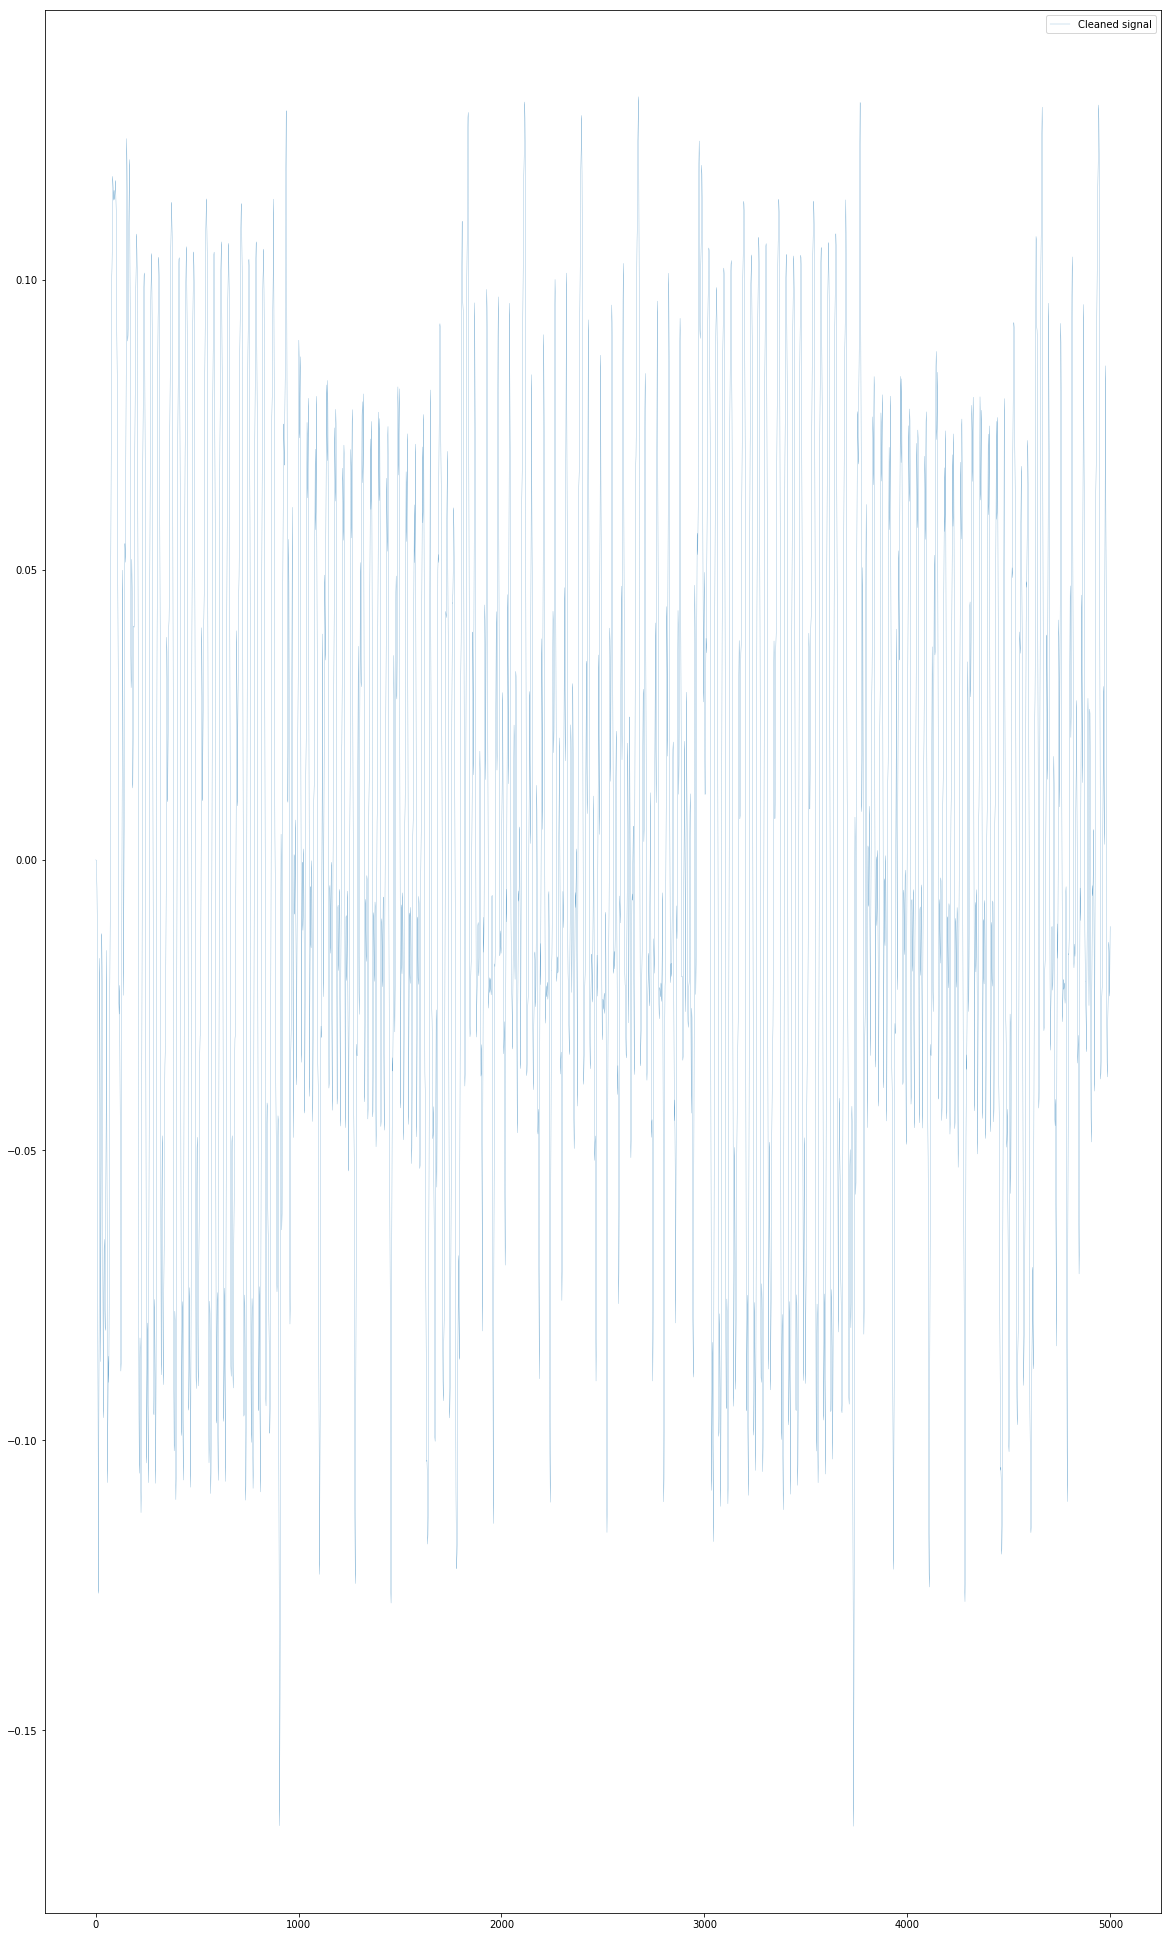

In [81]:
from scipy.signal import butter, lfilter

def butter_lowpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    sos = butter(order, low, analog=False, btype='low', output='sos')
    return sos

def butter_lowpass_filter(data, lowcut, fs, order=5):
    sos = butter_lowpass(lowcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

def remove_noise_trace(data):
    low = 0.8
    fs = 2.0
    filtered = butter_lowpass_filter(data, low, fs)
    return filtered

plt.plot(traces[0], linewidth=.2, label='Cleaned signal')
plt.legend(loc='best')
plt.show()
b, a = signal.butter(2,0.8, btype='low')
traces = clean(traces, b, a)
def c1(data):
    T = 0.8
    nsamples = T * fs
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.3
    f0 = 2
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()


IndentationError: expected an indented block (<ipython-input-77-2beddcdb8ac9>, line 4)